Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_squared_error, accuracy_score, r2_score,confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

Dataset


In [3]:

# Load the dataframe
data = pd.read_excel("dataset_excavate.xlsx")
df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())

  functional group   A  A_OS  A'  A'_OS  A_HOMO-  A_HOMO+   A_IE-   A_IE+  \
0       AgBaAuCdO6  Ag     3  Ba      2    0.585   -3.820  114.05  616.95   
1       AgBaAuHgO6  Ag     3  Ba      2    0.585   -3.820  114.05  616.95   
2       AgBaMoCdO6  Ag     3  Ba      2    0.585   -3.820  114.05  616.95   
3           AgBiO3  Ag     1  Ag      1    0.000   -4.405    0.00  731.00   
4           AgBrO3  Ag     1  Ag      1    0.000   -4.405    0.00  731.00   

   A_LUMO-  ...   B_X+  B_Z_radii-  B_Z_radii+  B_e_affin-  B_e_affin+  \
0   0.6485  ...  2.115      0.2225      2.4375       145.4        77.4   
1   0.6485  ...  2.270      0.1250      2.5350       135.4        87.4   
2   0.6485  ...  1.925      0.2525      2.4675        70.0         2.0   
3   0.0000  ...  2.020      0.0000      1.9970         0.0        91.3   
4   0.0000  ...  2.960      0.0000      1.2000         0.0       324.7   

   PBE band gap        μ       μĀ     μ𝐵 ̅        t  
0        0.0000  0.54286  0.13571  0.1

Data Preprocessing

In [ ]:

# Preprocessing
# Check for missing values
print(df.isnull().sum())

# Convert non-numeric columns to numeric
# For categorical columns, use Label Encoding or OneHot Encoding
for column in df.select_dtypes(include=['object']).columns:
    try:
        # If a column is categorical,encoding it
        df[column] = LabelEncoder().fit_transform(df[column].astype(str))
    except Exception as e:
        print(f"Could not encode column {column} due to {e}")

# Handle missing values by filling with mean for numeric columns
df.fillna(df.mean(), inplace=True)

functional group    0
A                   0
A_OS                0
A'                  0
A'_OS               0
A_HOMO-             0
A_HOMO+             0
A_IE-               0
A_IE+               0
A_LUMO-             0
A_LUMO+             0
A_X-                0
A_X+                0
A_Z_radii-          0
A_Z_radii+          0
A_e_affin-          0
A_e_affin+          0
Bi                  0
B_OS                0
B'                  0
B'_OS               0
B_HOMO-             0
B_HOMO+             0
B_IE-               0
B_IE+               0
B_LUMO-             0
B_LUMO+             0
B_X-                0
B_X+                0
B_Z_radii-          0
B_Z_radii+          0
B_e_affin-          0
B_e_affin+          0
PBE band gap        0
μ                   0
μĀ                  0
μ𝐵 ̅                0
t                   0
dtype: int64


Feature Selection

In [5]:
# Feature selection for classification
X_classification = df.drop(columns=['PBE band gap'])
y_classification = (df['PBE band gap'] >= 0.5).astype(int)  # 1 for insulators, 0 for non-insulators

# Split the dataset into training and testing sets (80-20 split)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Create and train the classification model
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_class, y_train_class)

# Make predictions
y_pred_class = classifier.predict(X_test_class)

# Evaluate the classification model
print(classification_report(y_test_class, y_pred_class))

# Calculate accuracy for classification
classification_accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Classification Accuracy: {classification_accuracy}')

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       694
           1       0.92      0.79      0.85       337

    accuracy                           0.91      1031
   macro avg       0.91      0.88      0.89      1031
weighted avg       0.91      0.91      0.91      1031

Classification Accuracy: 0.9088263821532493


Prediction Values

In [6]:
# Creating a DataFrame to display actual vs predicted values for classification
classification_results = pd.DataFrame({
    'Actual': y_test_class,
    'Predicted': y_pred_class
})

print("\nClassification Results (Actual vs Predicted):")
print(classification_results)


Classification Results (Actual vs Predicted):
      Actual  Predicted
1879       0          0
1417       1          1
2968       0          0
1020       0          0
4724       1          1
...      ...        ...
4872       0          0
1871       1          1
2981       1          1
1973       0          0
4700       0          0

[1031 rows x 2 columns]


Regression

In [7]:


# Now for the regression task, we only use insulators
insulators_data = df[df['PBE band gap'] > 0.5]
X_regression = insulators_data.drop(columns=['PBE band gap'])
y_regression = insulators_data['PBE band gap']

# Split the insulator dataset into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

# Create and train the regression model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_reg = regressor.predict(X_test_reg)

# Evaluate the regression model
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f'Mean Squared Error for Regression: {mse}')

# Calculating R^2 for regression 
r2 = r2_score(y_test_reg, y_pred_reg)
print(f'R^2 Score for Regression: {r2}')

# DataFrame for actual vs predicted values for regression
regression_results = pd.DataFrame({
    'Actual': y_test_reg,
    'Predicted': y_pred_reg
})

classification_accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Classification Accuracy: {classification_accuracy}')


print("\nRegression Results (Actual vs Predicted):")
print(regression_results)


Mean Squared Error for Regression: 0.12521733692897802
R^2 Score for Regression: 0.7984552907729168
Classification Accuracy: 0.9088263821532493

Regression Results (Actual vs Predicted):
      Actual  Predicted
3930  1.7258   1.696190
2689  0.9641   1.068897
3667  1.8073   2.431779
1908  2.9220   2.919821
1859  1.4248   1.370229
...      ...        ...
3481  3.2435   2.789190
3857  1.3344   1.648026
4279  0.9639   1.453642
4864  1.4270   2.136060
3324  2.2611   2.230441

[316 rows x 2 columns]


OUTPUTS

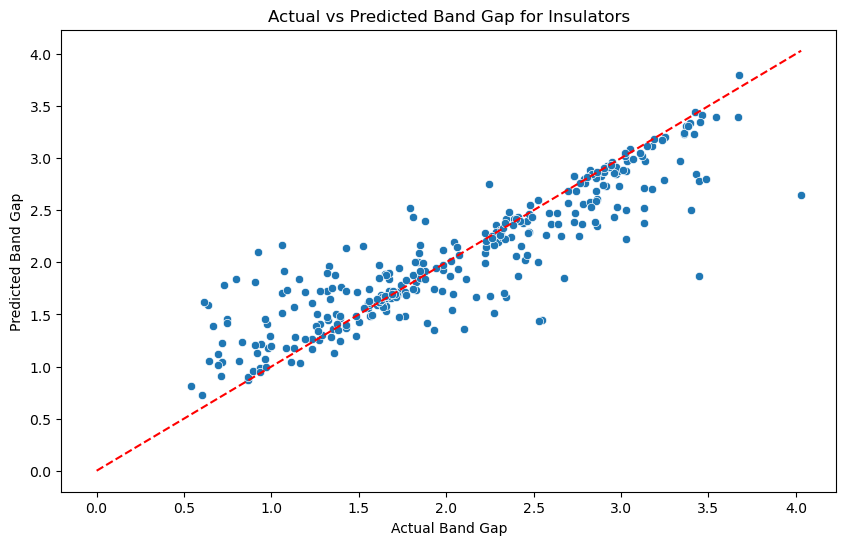

In [8]:
#OUTPUTS on screen
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_reg, y=y_pred_reg)
plt.xlabel('Actual Band Gap')
plt.ylabel('Predicted Band Gap')
plt.title('Actual vs Predicted Band Gap for Insulators')
plt.plot([0, max(y_test_reg)], [0, max(y_test_reg)], color='red', linestyle='--')  # Diagonal line
plt.show()

Classification

In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# Load the dataframe
df = pd.read_excel("dataset_excavate.xlsx")  # Change to your file path

# Display basic information
print("Data Information:")
print(df.info())
print("\nFirst few rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in each column:\n", df.isnull().sum())

# Clean the 'PBE band gap' column
# Convert to numeric, replacing non-numeric values with NaN
df['PBE band gap'] = pd.to_numeric(df['PBE band gap'], errors='coerce')

# Check for missing values again after conversion
print("\nMissing values after cleaning 'PBE band gap':\n", df['PBE band gap'].isnull().sum())


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5152 entries, 0 to 5151
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   functional group  5152 non-null   object 
 1   A                 5152 non-null   object 
 2   A_OS              5152 non-null   int64  
 3   A'                5152 non-null   object 
 4   A'_OS             5152 non-null   int64  
 5   A_HOMO-           5152 non-null   float64
 6   A_HOMO+           5152 non-null   float64
 7   A_IE-             5152 non-null   float64
 8   A_IE+             5152 non-null   float64
 9   A_LUMO-           5152 non-null   float64
 10  A_LUMO+           5152 non-null   float64
 11  A_X-              5152 non-null   float64
 12  A_X+              5152 non-null   float64
 13  A_Z_radii-        5152 non-null   float64
 14  A_Z_radii+        5152 non-null   float64
 15  A_e_affin-        5152 non-null   float64
 16  A_e_affin+        5152 n

Classfication (>=)

In [ ]:
# Impute missing values in 'PBE band gap' with the mean
imputer = SimpleImputer(strategy='mean')
df['PBE band gap'] = imputer.fit_transform(df[['PBE band gap']])

# Check the shape of the DataFrame after imputation
print("\nShape of DataFrame after imputation:", df.shape)

# Define target for classification (Binary)
df['is_insulator'] = df['PBE band gap'].apply(lambda x: 1 if x >= 0.5 else 0)

# Splitting Features and Target
X = df.drop(columns=['PBE band gap', 'functional group', 'is_insulator'], errors='ignore')  # Drop non-numeric and target columns
y = df['is_insulator']

# Ensure all columns in X are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Impute missing values in features with the mean
X_imputer = SimpleImputer(strategy='mean')
X = X_imputer.fit_transform(X)

# Check the shape of X to ensure it's not empty
print("\nShape of X after imputation:", X.shape)

Normalization

In [16]:
# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Classification Model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

Confusion Matrix


Classification Accuracy: 0.9078564500484966

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       694
           1       0.93      0.78      0.85       337

    accuracy                           0.91      1031
   macro avg       0.91      0.88      0.89      1031
weighted avg       0.91      0.91      0.91      1031



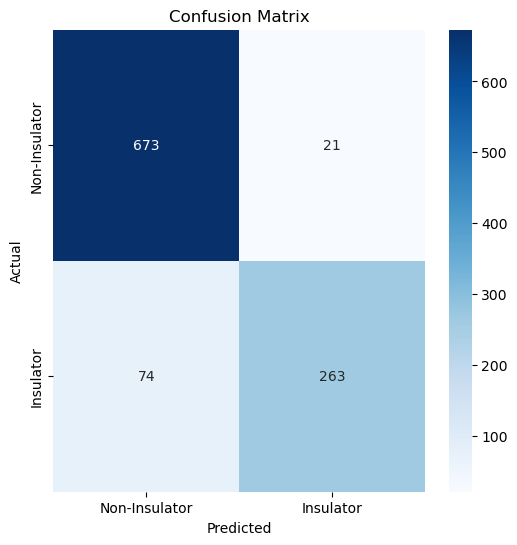

In [17]:
# Evaluate Classification
print("\nClassification Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Insulator', 'Insulator'], yticklabels=['Non-Insulator', 'Insulator'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()